In [298]:
#In this example, you'll be creating a Python script to visualize the weather of 500+ cities across the world of varying distance from the equator. To accomplish this, you'll be utilizing a [simple Python library](https://pypi.python.org/pypi/citipy), the [OpenWeatherMap API](https://openweathermap.org/api), and a little common sense to create a representative model of weather across world cities.

1st Objective - Scatter Plots

In [299]:
#Your first objective is to build a series of scatter plots to showcase the following relationships:

#* Temperature (F) vs. Latitude
#* Humidity (%) vs. Latitude
#* Cloudiness (%) vs. Latitude
#* Wind Speed (mph) vs. Latitude

#After each plot add a sentence or two explaining what the code is and analyzing.

In [300]:
#Import dependencies
from citipy import citipy
from pprint import pprint
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np 
from config import api_key
import random
import decimal
import requests
from time import sleep

In [301]:
###########create random list of latitudes and longitude - REPLACE 5 WITH 500 LATER ON
latitudes = []
longitudes = []

for i in range(0,5):
    x = float(decimal.Decimal(random.randint(-18000,18000))/100)
    latitudes.append(x)

lat_df = pd.DataFrame(latitudes, columns = ["Latitude"])

for y in range(0,5):
    y = float(decimal.Decimal(random.randint(-18000,18000))/100)
    longitudes.append(y)

long_df = pd.DataFrame(longitudes, columns=["Longitude"])

In [302]:
#combine Latitude and Longitude lists to get coordinates
coord_df = pd.concat([lat_df,long_df], axis=1)
#coordinates_df = coord_df
coord_df.head()

,Latitude,Longitude
0,21.31,153.33
1,87.59,-59.37
2,-39.13,131.37
3,-158.52,87.64
4,179.53,-63.03


In [303]:
#find city closest to the coordinates created
#loop through the latitude and longitude for each set of coords to pull city from citipy
cities = []
cc = []
for index, row in coord_df.iterrows():
    lat = row["Latitude"]
    long = row["Longitude"]

    city = citipy.nearest_city(lat,long)
    cities.append(city.city_name)

cities_df = pd.DataFrame(cities, columns = ["City Name"])

cities_df = pd.concat([cities_df,coord_df], axis =1)

cities_df.head()

,City Name,Latitude,Longitude
0,katsuura,21.31,153.33
1,narsaq,87.59,-59.37
2,port lincoln,-39.13,131.37
3,albany,-158.52,87.64
4,qaanaaq,179.53,-63.03


In [304]:
#set-up URLs
units = "imperial"
base_url = f"http://api.openweathermap.org/data/2.5/weather?units={units}&appid={api_key}&q="


In [305]:
#pull weather data from open weather
temp = []
humid = []
clouds = []
windspeed = []
city_lats = []
city_long = []
city_list = []

for city in cities_df["City Name"]:
    response = requests.get(base_url+city).json()
    #append the list

    try:
        temp.append(response["main"]["temp"])
        humid.append(response["main"]["humidity"])
        clouds.append(response["clouds"]["all"])
        windspeed.append(response["wind"]["speed"])
        city_lats.append(response["coord"]["lat"])
        city_long.append(response["coord"]["lon"])
        city_list.append(city)

    except:
        print(f"{city} not found!")
        pass
    #add pause so loop doesn't time out
    sleep(0.5)


In [306]:
temp_df = pd.DataFrame(temp, columns = ["Temps"])
humid_df = pd.DataFrame(humid, columns = ["Humidity"])
clouds_df = pd.DataFrame(clouds, columns = ["Clouniness"])
windspeed_df = pd.DataFrame(windspeed, columns = ["Windspeed"])
city_lats_df = pd.DataFrame(city_lats, columns = ["City Lat"])
city_long_df = pd.DataFrame(city_long, columns = ["City Long"])
city_list_df = pd.DataFrame(city_list, columns = ["City Name"])

In [307]:
#In the comparison of Temperature vs Latitude, the code is looking at where the city sits by Latitude on the globe and then looking at it's current temperature. The scatterplot looks at the correlation between distance from the equator to the current temperature.

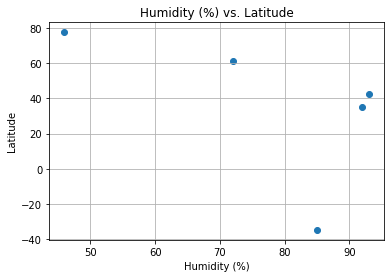

In [308]:
#* Humidity (%) vs. Latitude
plt.scatter(humid,city_lats, marker = "o")
plt.title("Humidity (%) vs. Latitude")
plt.xlabel("Humidity (%)")
plt.ylabel("Latitude")
plt.grid(True)


In [309]:
#In the comparison of Humidty % vs Latitude, the code is looking at where the city sits by Latitude on the globe and then looking at it's current humidity %. The scatterplot is showing how distance from the equator might affect the level of humidity in a certain city.

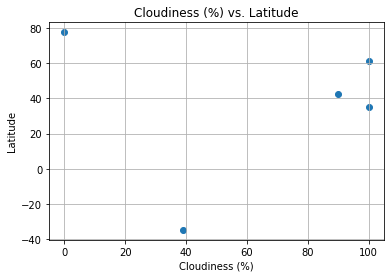

In [310]:
#* Cloudiness (%) vs. Latitude
plt.scatter(clouds,city_lats, marker = "o")
plt.title("Cloudiness (%) vs. Latitude")
plt.xlabel("Cloudiness (%)")
plt.ylabel("Latitude")
plt.grid(True)

In [311]:
#In the comparison of Cloudiness % vs Latitude, the code is looking at where the city sits by Latitude on the globe and then pulling it's current Cloud coverage %. The scatterplot is showing how distance from the equator might affect the cloudiness of a certain city.

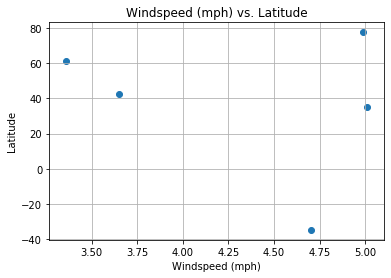

In [312]:
#* Wind Speed (mph) vs. Latitude
plt.scatter(windspeed,city_lats, marker = "o")
plt.title("Windspeed (mph) vs. Latitude")
plt.xlabel("Windspeed (mph)")
plt.ylabel("Latitude")
plt.grid(True)

In [313]:
#In the comparison of Windspeed (mph) vs Latitude, the code is looking at where the city sits by Latitude on the globe and then pulling it's current wind speed. The scatterplot is showing how distance from the equator might affect windiness of a certain city.

2nd Objective - Linear Regression

In [314]:
#Your next objective is to run linear regression on each relationship, only this time separating them into Northern Hemisphere (greater than or equal to 0 degrees latitude) and Southern Hemisphere (less than 0 degrees latitude):

#* Northern Hemisphere - Temperature (F) vs. Latitude
#* Southern Hemisphere - Temperature (F) vs. Latitude
#* Northern Hemisphere - Humidity (%) vs. Latitude
#* Southern Hemisphere - Humidity (%) vs. Latitude
#* Northern Hemisphere - Cloudiness (%) vs. Latitude
#* Southern Hemisphere - Cloudiness (%) vs. Latitude
#* Northern Hemisphere - Wind Speed (mph) vs. Latitude
#* Southern Hemisphere - Wind Speed (mph) vs. Latitude

#After each pair of plots explain what the linear regression is modelling such as any relationships you notice and any other analysis you may have.

In [315]:
#combine all city data into one DataFrame
city_df = pd.concat([city_list_df,city_lats_df,city_long_df,temp_df,humid_df,clouds_df,windspeed_df],axis=1)

city_df.head()

,City Name,City Lat,City Long,Temps,Humidity,Clouniness,Windspeed
0,katsuura,35.13,140.30,38.17,92,100,5.01
1,narsaq,60.92,-46.05,15.80,72,100,3.36
2,port lincoln,-34.73,135.87,64.17,85,39,4.70
3,albany,42.60,-73.97,37.06,93,90,3.65
4,qaanaaq,77.48,-69.36,-13.38,46,0,4.99


In [325]:
#determine northern and southern hemisphere cities
n_cities = []
s_cities = []

for index, row in city_df.iterrows():

    if row["City Lat"] > 0:
        n_cities.append(row["City Name"])
    else:
        s_cities.append(row["City Name"])

print(s_cities)
print(n_cities)

['port lincoln']
['katsuura', 'narsaq', 'albany', 'qaanaaq']


In [0]:
#Linear regression on Northern Hemisphere - Temperature (F) vs. Latitude
#

In [0]:
#Your final notebook must:

#* Randomly select **at least** 500 unique (non-repeat) cities based on latitude and longitude.
#* Perform a weather check on each of the cities using a series of successive API calls.
#* Include a print log of each city as it's being processed with the city number and city name.
#* Save a CSV of all retrieved data and a PNG image for each scatter plot.
